# ZDMP

Project from [https://github.com/ZhengLinLei/ZDMP](https://github.com/ZhengLinLei/ZDMP)

![License](https://img.shields.io/badge/License-Apache%202.0-green)


## Load Datasets

Load the .csv dataset from [GitHub Repository](https://github.com/ZhengLinLei/ZDMP-datasets)

RAW: [.csv](https://media.githubusercontent.com/media/ZhengLinLei/ZDMP-datasets/main/batch_data.csv)



In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://media.githubusercontent.com/media/ZhengLinLei/ZDMP-datasets/main/batch_data.csv')

# Remove all not Number item row
df = df[np.isfinite(df).all(1)]

## Prepare data


### X and Y

Separate all .csv table data into X and Y. The result data is located in `realiability` column.

In [2]:
Y = df['reliability']
X = df.drop('reliability', axis=1)

### Split data

In this proccess we are going to split the data into two parts `training data` (80%) and `testing data` (20%). That's why we use the parameter `test_size=0.2` and `random_state=42` to set a seed that we use to shuffle our data.



In [3]:
from sklearn.model_selection import train_test_split

# Split the data into four data variables: Training(x,y), Testing(x,y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
X_train

,ID V1,ID V10,ID V11,ID V12,ID V13,ID V14,ID V15,ID V16,ID V17,ID V18,...,CV V5,CV V6,CV V7,CV V8,CV V9,CV V10,CV V11,CV V12,CV V13,IMP Paso
20126,1,56,119,696,367,438,17,742,521,360,...,28.2208,59.4618,0.0,26.8645,58.9193,0.0,36.5849,595.983,0.0,0
36646,1,54,123,693,368,469,18,733,530,360,...,29.4416,63.8925,0.0,30.8883,63.3048,0.0,61.7224,941.714,0.0,0
19385,1,61,133,684,367,437,18,720,509,360,...,28.4921,58.5576,0.0,27.5879,58.0150,0.0,34.1435,622.432,0.0,0
27012,1,63,124,680,368,459,18,731,532,360,...,28.2208,56.5231,0.0,26.3672,56.0257,0.0,45.4915,506.917,0.0,0
40808,1,56,121,693,368,467,19,734,528,360,...,20.4445,71.2619,0.0,19.9020,70.5838,0.0,25.6890,916.395,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6467,1,56,119,693,368,466,18,726,526,360,...,29.3963,59.1453,0.0,27.7687,58.6028,0.0,38.2577,575.684,0.0,0
11650,1,58,115,693,366,467,18,733,526,360,...,27.5879,57.2012,0.0,26.1411,56.7039,0.0,48.5659,307.581,0.0,0
39396,1,55,162,712,369,471,17,736,509,360,...,31.2952,54.6694,0.0,36.6754,54.1721,0.0,43.1405,828.505,0.0,0
886,1,60,158,740,366,474,17,746,523,360,...,28.4017,55.6189,0.0,27.3166,55.0763,0.0,45.4463,356.545,0.0,0


In [5]:
Y_train

20126    0.626774
36646    0.628032
19385    0.626774
27012    0.591375
40808    0.612040
           ...   
6467     0.351662
11650    1.000000
39396    0.642767
886      0.770710
16311    0.626774
Name: reliability, Length: 32112, dtype: float64

## Model training

### Linear Regression


#### Training the model

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

#### Aplying the model to make a prediction

In [7]:
Y_lr_train_pred = lr.predict(X_train)
Y_lr_test_pred = lr.predict(X_test)

In [8]:
Y_lr_train_pred

array([0.60742188, 0.64453125, 0.59375   , ..., 0.69384766, 0.85644531,
       0.56396484])

In [9]:
Y_lr_test_pred

array([0.29248047, 0.20263672, 0.41845703, ..., 0.65576172, 0.71923828,
       0.59619141])

#### Evaluate model perfomance

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(Y_train, Y_lr_train_pred)
lr_train_r2 = r2_score(Y_train, Y_lr_train_pred)

lr_test_mse = mean_squared_error(Y_test, Y_lr_test_pred)
lr_test_r2 = r2_score(Y_test, Y_lr_test_pred)

In [11]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  0.02626855546653402
LR R2 (Train):  0.6538090267304537
LR MSE (Test):  45963637328.191605
LR R2 (Test):  -609552859335.9525


In [12]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [13]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.026269,0.653809,45963637328.191605,-609552859335.952515


### Random Forest


#### Training the model


In [14]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=2, random_state=100)

#### Aplying the model to make a prediction


In [15]:
Y_rf_train_pred = rf.predict(X_train)
Y_rf_test_pred = rf.predict(X_test)

#### Evaluate model perfomance

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(Y_train, Y_rf_train_pred)
rf_train_r2 = r2_score(Y_train, Y_rf_train_pred)

rf_test_mse = mean_squared_error(Y_test, Y_rf_test_pred)
rf_test_r2 = r2_score(Y_test, Y_rf_test_pred)

In [17]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [18]:
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,0.054894,0.276561,0.053715,0.287655


### K-Nearest Neighbors

#### Training the model

In [19]:
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor(n_neighbors=1)
kn.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=1)

#### Aplying the model to make a prediction

In [20]:
Y_kn_train_pred = kn.predict(X_train)
Y_kn_test_pred = kn.predict(X_test)

#### Evaluate model perfomance

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

kn_train_mse = mean_squared_error(Y_train, Y_kn_train_pred)
kn_train_r2 = r2_score(Y_train, Y_kn_train_pred)

kn_test_mse = mean_squared_error(Y_test, Y_kn_test_pred)
kn_test_r2 = r2_score(Y_test, Y_kn_test_pred)

In [22]:
kn_results = pd.DataFrame(['K-Nearest Neighbors', kn_train_mse, kn_train_r2, kn_test_mse, kn_test_r2]).transpose()
kn_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [23]:
kn_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,K-Nearest Neighbors,0.000056,0.999266,0.014994,0.801152


### Support Vector Machine

Training the model


In [24]:
from sklearn.svm import SVR

sv = SVR()
sv.fit(X_train, Y_train)

SVR()

#### Aplying the model to make a prediction

In [25]:
Y_sv_train_pred = sv.predict(X_train)
Y_sv_test_pred = sv.predict(X_test)

#### Evaluate model perfomance

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

sv_train_mse = mean_squared_error(Y_train, Y_sv_train_pred)
sv_train_r2 = r2_score(Y_train, Y_sv_train_pred)

sv_test_mse = mean_squared_error(Y_test, Y_sv_test_pred)
sv_test_r2 = r2_score(Y_test, Y_sv_test_pred)

In [27]:
sv_results = pd.DataFrame(['S-Vector Machine', sv_train_mse, sv_train_r2, sv_test_mse, sv_test_r2]).transpose()
sv_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [32]:
sv_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,S-Vector Machine,0.04492,0.408009,0.043429,0.424063


## Model comparison

In [33]:
df_models = pd.concat([lr_results, rf_results, kn_results, sv_results], axis=0)

In [34]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.026269,0.653809,45963637328.191605,-609552859335.952515
1,Random forest,0.054894,0.276561,0.053715,0.287655
2,K-Nearest Neighbors,0.000056,0.999266,0.014994,0.801152
3,S-Vector Machine,0.04492,0.408009,0.043429,0.424063


## Data visualization

Text(0.5, 0, 'Experimental Reliability')

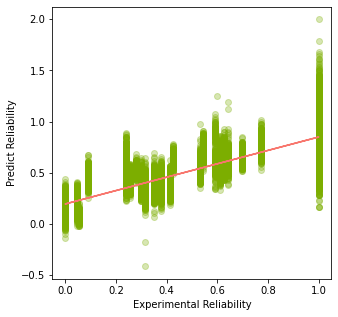

In [35]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=Y_train, y=Y_lr_train_pred, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(Y_train, Y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(Y_train, p(Y_train), '#F8766D')
plt.ylabel('Predict Reliability')
plt.xlabel('Experimental Reliability')